# Predicting Survival Passenger

[ref](https://qiita.com/suzumi/items/8ce18bc90c942663d1e6)

In [181]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

import csv
import os
import logging
import pandas as pd
from pathlib import Path
from sklearn import svm
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier

import csv

In [182]:
os.getcwd()

'/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification'

In [183]:
os.chdir("/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification/")
os.getcwd()

'/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification'

In [184]:
os.listdir()

['.DS_Store',
 'LICENSE',
 'requirements.txt',
 'references',
 'Makefile',
 'models',
 '__pycache__',
 'docs',
 'README.md',
 'setup.py',
 '.gitignore',
 '.env',
 'tox.ini',
 '.git',
 'data',
 'notebooks',
 'test_environment.py',
 'reports',
 'src']

# prepare data

In [185]:
df= pd.read_csv("data/raw/train.csv").replace("male",0).replace("female",1)

# preprocessing

 ## missing data

In [72]:
df["Age"].fillna(df.Age.median(), inplace=True)

## check data

([array([  80.,   97.,  372.]), array([ 216.,  184.,  491.])],
 array([ 1.        ,  1.66666667,  2.33333333,  3.        ]),
 <a list of 2 Lists of Patches objects>)

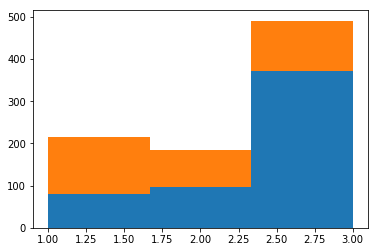

In [73]:
split_data = []
for survived in [0,1]:
    split_data.append(df[df.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=3)

([array([  13.,   13.,    8.,   63.,   80.,  191.,   47.,   39.,   30.,
           23.,   14.,   11.,   10.,    3.,    4.,    0.]),
  array([  44.,   20.,   19.,   96.,  122.,  285.,   88.,   67.,   47.,
           39.,   24.,   18.,   14.,    3.,    4.,    1.])],
 array([  0.42   ,   5.39375,  10.3675 ,  15.34125,  20.315  ,  25.28875,
         30.2625 ,  35.23625,  40.21   ,  45.18375,  50.1575 ,  55.13125,
         60.105  ,  65.07875,  70.0525 ,  75.02625,  80.     ]),
 <a list of 2 Lists of Patches objects>)

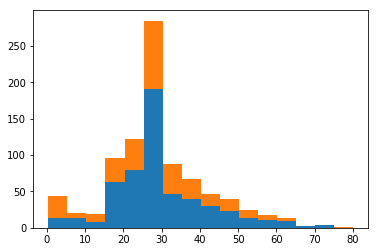

In [74]:
temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=16)

## make variables

In [75]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [76]:
# check types of df
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
FamilySize       int64
dtype: object

In [79]:
df2.values[0:800,:].to_csv("test.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [35]:
df2.to_csv("data/processed/processed_df.csv")

# learning data

In [53]:
input_filepath = "/home/jovyan/BigDataAnalytics/bda_py_folder/class3/titanic_bda/survival_classification/data/processed/processed_df.csv"
df = pd.read_csv(input_filepath, index_col=0)

extract head 800 observations and use them as train dataset.<br>
Other 91 observation use as test dataset.

In [59]:
# train dataset
train_data = df2.values
xs = train_data[0:800, 2:] # Pclass以降の変数
y  = train_data[0:800, 1]  # 正解データ

In [62]:
# forest = RandomForestClassifier(n_estimators = 100)
# # 学習
# forest = forest.fit(xs, y)

clf = svm.SVC()
clf.fit(xs, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
# len(xs)
train_data.shape[0]

891

In [80]:
forest = RandomForestClassifier(n_estimators = 100)

# 学習
forest = forest.fit(xs, y)

# test_df= pd.read_csv("test.csv").replace("male",0).replace("female",1)
# # # 欠損値の補完
# test_df["Age"].fillna(df.Age.median(), inplace=True)
# test_df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
# test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

In [84]:
# test dataset
xs_test = train_data[801:train_data.shape[0], 2:] # Pclass以降の変数
y_test  = train_data[801:train_data.shape[0], 1]  # 正解データ

In [88]:
print('rf score : ' , forest.score(xs_test, y_test))

rf score :  0.833333333333


## predict data

In [55]:
# test dataset
xs_test = train_data[801:train_data.shape[0], 2:] # Pclass以降の変数
y  = train_data[801:train_data.shape[0], 1]  # 正解データ

output = forest.predict(xs_test)

print(len(y), len(output))
zip_data = zip(y.astype(int), output.astype(int))
predict_data = list(zip_data)
predict_data

90 90


[(1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1)]

# save output file as csv

In [45]:
with open("class3/predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])

# test 

In [91]:
# -*- coding: utf-8 -*-

import os
import click
import logging
import pandas as pd
from pathlib import Path
from sklearn import svm
from sklearn import tree
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import csv

In [92]:
# load data
df = pd.read_csv("data/processed/processed_df.csv")

# define train dataset
train_data = df.values
xs = train_data[0:800, 2:] # features
y  = train_data[0:800, 1]  # binary variables
# define test datasets
xs_test = train_data[801:train_data.shape[0], 2:] # features
y_test  = train_data[801:train_data.shape[0], 1]

# build ml models -------------------------

# train svm
clf_svm = svm.SVC()
clf_svm = clf_svm.fit(xs, y)

# train RandomForest
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf = clf_rf.fit(xs, y)

# train desicion tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(xs, y)

# train LogisticRegression
clf_rl = LogisticRegression(random_state=1)
clf_rl = clf_rl.fit(xs, y)

# score to train data
svm_score = clf_svm.score(xs, y)
rf_score  = clf_rf.score(xs, y)
dt_score  = clf_dt.score(xs, y)
rl_score  = clf_rl.score(xs, y)

# serialize models
joblib.dump(clf_svm, 'models/clf_svm.pkl')
joblib.dump(clf_rf, 'models/clf_rf.pkl')
joblib.dump(clf_dt, 'models/clf_dt.pkl')
joblib.dump(clf_rl, 'models/clf_rl.pkl')

# print score
print('svm score : {}'.format(svm_score))
print('rf score  : {}'.format(rf_score))
print('dt score  : {}'.format(dt_score))
print('rl score  : {}'.format(rl_score))

svm score : 0.58125
rf score  : 0.58125
dt score  : 0.58125
rl score  : 0.0275


In [97]:
# prepare tets data
df = pd.read_csv("data/processed/processed_df.csv")

# define train dataset
train_data = df.values
xs_test = train_data[801:train_data.shape[0], 2:] # features
y_test  = train_data[801:train_data.shape[0], 1]  # target


In [98]:

# 予測モデルを復元
clf_svm = joblib.load('models/clf_svm.pkl')
clf_rf = joblib.load('models/clf_rf.pkl')
clf_dt = joblib.load('models/clf_dt.pkl')
clf_rl = joblib.load('models/clf_rl.pkl')


In [99]:
# check sroce to test data
svm_score = clf_svm.score(xs_test, y_test)
rf_score  = clf_rf.score(xs_test, y_test)
dt_score  = clf_dt.score(xs_test, y_test)
rl_score  = clf_rl.score(xs_test, y_test)


In [125]:

# output predict result
result_df = pd.concat([pd.DataFrame({"origin" : y_test}),
                           pd.DataFrame({"svm": clf_svm.predict(xs_test),
                                                       "rf"    : clf_rf.predict(xs_test),
                                                       "dt"  : clf_dt.predict(xs_test),
                                                       "rl"   : clf_rl.predict(xs_test)})], axis=1)
result_df
# result_df.to_csv(output_filepath, index=None)

# print score
# print('svm score : {}'.format(svm_score))
# print('rf score  : {}'.format(rf_score))
# print('dt score  : {}'.format(dt_score))
# print('rl score  : {}'.format(rl_score))

,origin,dt,rf,rl,svm
0,802.0,507.0,507.0,775.0,329.0
1,803.0,391.0,551.0,325.0,420.0
2,804.0,756.0,752.0,789.0,756.0
3,805.0,147.0,147.0,339.0,147.0
4,806.0,750.0,750.0,117.0,750.0
5,807.0,31.0,264.0,97.0,796.0
6,808.0,655.0,655.0,247.0,655.0
7,809.0,706.0,796.0,117.0,796.0
8,810.0,413.0,413.0,572.0,413.0
9,811.0,163.0,629.0,772.0,629.0


In [123]:
pd.DataFrame({"A": clf_svm.predict(xs_test),
                           "B" : clf_rf.predict(xs_test),
                           "C" : clf_dt.predict(xs_test),
                           "D" : clf_rl.predict(xs_test)})

,A,B,C,D
0,329.0,507.0,507.0,775.0
1,420.0,551.0,391.0,325.0
2,756.0,752.0,756.0,789.0
3,147.0,147.0,147.0,339.0
4,750.0,750.0,750.0,117.0
5,796.0,264.0,31.0,97.0
6,655.0,655.0,655.0,247.0
7,796.0,796.0,706.0,117.0
8,413.0,413.0,413.0,572.0
9,629.0,629.0,163.0,772.0


In [112]:
from datetime import datetime
now_ymd = datetime.now().strftime('%m%d')
now_ymd

'0515'

In [114]:
"data/processed/result_{}_df.csv".format(datetime.now().strftime('%m%d'))

'data/processed/result_0515_df.csv'

# vis

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [131]:
FROM_DATA_DIR = "data/processed/"
df = pd.read_csv(FROM_DATA_DIR + "result_0515.csv")

In [178]:
def score_result(actual, predict, model_name):
    print("----------------- Result of {} -----------------".format(model_name))
    print("{0:10} .... %.3f".format("Accuracy") % accuracy_score(actual, predict))
    print("{0:12} .... %.3f".format("Precision") % precision_score(actual, predict))
    print("{0:14} .... %.3f".format("Recall") % recall_score(actual, predict))
    print("{0:7} .... %.3f".format("F-measure") % f1_score(actual, predict))


In [180]:
score_result(df["origin"], df["svm"], "SVM")

----------------- Result of SVM -----------------
Accuracy   .... 0.822
Precision    .... 0.821
Recall         .... 0.676
F-measure .... 0.742


# train model

In [186]:
# prepare tets data
df = pd.read_csv("data/processed/processed_df.csv")

# define train dataset
train_data = df.values
xs = train_data[0:800, 2:] # features
y  = train_data[0:800, 1]  # binary variables
# define test datasets
xs_test = train_data[801:train_data.shape[0], 2:] # features
y_test  = train_data[801:train_data.shape[0], 1]

# build ml models -------------------------

# train svm
clf_svm = svm.SVC()
clf_svm = clf_svm.fit(xs, y)

# train RandomForest
clf_rf = RandomForestClassifier(n_estimators = 100)
clf_rf = clf_rf.fit(xs, y)

# train desicion tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(xs, y)

# train LogisticRegression
clf_rl = LogisticRegression(random_state=1)
clf_rl = clf_rl.fit(xs, y)

# score to train data
svm_score = clf_svm.score(xs, y)
rf_score  = clf_rf.score(xs, y)
dt_score  = clf_dt.score(xs, y)
rl_score  = clf_rl.score(xs, y)

# serialize models
joblib.dump(clf_svm, 'models/clf_svm.pkl')
joblib.dump(clf_rf, 'models/clf_rf.pkl')
joblib.dump(clf_dt, 'models/clf_dt.pkl')
joblib.dump(clf_rl, 'models/clf_rl.pkl')

# print score
print('svm score : %.3f' % svm_score)
print('rf score  : %.3f' % rf_score)
print('dt score  : %.3f' % dt_score)
print('rl score  : %.3f' % rl_score)


svm score : 0.869
rf score  : 0.911
dt score  : 0.911
rl score  : 0.800


In [192]:
clf_svm.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>